In [18]:
import numpy as np
import pandas as pd

In [10]:
def bayes_rule(priors, likelihood):
    marg=sum(np.multiply(priors,likelihood))
    post=np.divide(np.multiply(priors,likelihood),marg)
    return post

In [11]:
probas=[1/3,1/3,1/3]
likelihood=[0.4,0.6,0.3]
bayes_rule(probas,likelihood)


array([0.30769231, 0.46153846, 0.23076923])

In [54]:
n_draws=10000
prior=pd.Series(np.random.uniform(0,1,size=n_draws))

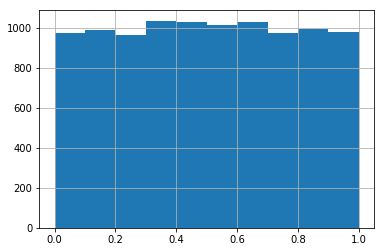

In [55]:
prior.hist()

In [56]:
def generative_model(param):
    result=np.random.binomial(50,param)
    return result

In [57]:
observed=10


In [58]:
sim_data=[]
for p in prior:
    sim_data.append(generative_model(p))

In [59]:
sim_data

[40,
 49,
 41,
 24,
 21,
 13,
 13,
 30,
 50,
 41,
 19,
 48,
 2,
 27,
 26,
 28,
 18,
 19,
 39,
 33,
 26,
 3,
 17,
 45,
 20,
 2,
 36,
 31,
 44,
 27,
 40,
 19,
 14,
 6,
 50,
 2,
 27,
 31,
 26,
 29,
 22,
 10,
 26,
 44,
 11,
 41,
 25,
 13,
 33,
 25,
 40,
 38,
 18,
 6,
 16,
 30,
 29,
 39,
 46,
 49,
 12,
 42,
 24,
 45,
 31,
 23,
 22,
 42,
 14,
 1,
 10,
 38,
 43,
 46,
 49,
 3,
 48,
 21,
 38,
 33,
 11,
 41,
 24,
 18,
 15,
 38,
 29,
 46,
 27,
 7,
 4,
 9,
 24,
 29,
 16,
 8,
 49,
 0,
 33,
 28,
 24,
 13,
 35,
 18,
 30,
 42,
 8,
 42,
 33,
 34,
 24,
 43,
 50,
 41,
 38,
 21,
 41,
 0,
 12,
 16,
 20,
 19,
 28,
 16,
 25,
 31,
 1,
 43,
 29,
 3,
 36,
 7,
 28,
 24,
 39,
 1,
 31,
 30,
 20,
 48,
 10,
 8,
 48,
 30,
 31,
 22,
 28,
 14,
 6,
 7,
 4,
 27,
 41,
 3,
 35,
 22,
 10,
 40,
 19,
 46,
 45,
 11,
 10,
 47,
 50,
 44,
 9,
 13,
 11,
 45,
 7,
 27,
 26,
 1,
 24,
 15,
 28,
 22,
 45,
 49,
 5,
 29,
 49,
 20,
 29,
 6,
 50,
 7,
 34,
 5,
 13,
 4,
 41,
 40,
 12,
 20,
 25,
 34,
 45,
 28,
 36,
 2,
 26,
 12,
 40,
 39,
 50

In [60]:
posterior = prior[list(map(lambda x: x==observed, sim_data))]
posterior.describe()

count    190.000000
mean       0.211444
std        0.055113
min        0.105476
25%        0.173625
50%        0.205003
75%        0.243820
max        0.366439
dtype: float64

In [61]:
print(posterior.quantile(.05),'|',posterior.quantile(.95))

0.12795540644862546 | 0.3067386215683293


# Maximum Likelihood Estimator

In [62]:
rounded = posterior.round(2)
mode = rounded.mode()[0]
mode
probability = list(rounded).count(mode)/len(rounded)
print('MLE = ',mode,'|',probability)

MLE =  0.2 | 0.11578947368421053
